In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xgi

## Notebook 1

In [2]:
H = xgi.Hypergraph()
H.add_nodes_from(["A", "B", "C", "D"])
H.add_edges_from([{"A", "B"}, {"A", "B", "C"}])
print(H)

Unnamed Hypergraph with 4 nodes and 2 hyperedges


In [3]:
DH = xgi.DiHypergraph()
DH.add_edge([{"A", "B"}, {"C", "D"}])
print(DH)

Unnamed DiHypergraph with 4 nodes and 1 hyperedges


## Notebook 2

In [4]:
H = xgi.load_xgi_data("contact-high-school")
m1 = H.num_edges

H.cleanup(
    isolates=True,
    singletons=True,
    multiedges=False,
    connected=False,
    relabel=False,
    in_place=True,
)
m2 = H.num_edges

multiplicity = m1 / m2
print(multiplicity)

22.004988488104374


In [5]:
H = xgi.load_xgi_data("congress-bills", max_order=10)
xgi.write_edgelist(H, "edgelist.txt", delimiter="\t")

## Notebook 3

In [6]:
H = xgi.load_xgi_data("kaggle-whats-cooking")

In [7]:
len(H.edges.filterby("size", 5, "gt"))

35991

In [8]:
len(H.nodes.filterby("degree", 1))

1759

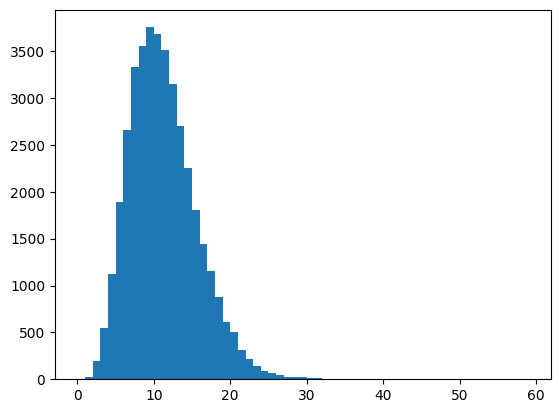

In [9]:
sizes = H.edges.size.asnumpy()
plt.hist(sizes, bins=np.arange(60))
plt.show()

In [10]:
@xgi.nodestat_func
def user_degree(net, bunch):
    """The user degree of a bunch of nodes in net."""
    return {
        n: sum(1.0 / net.edges.size[i] for i in net.nodes.memberships(n)) for n in bunch
    }

In [11]:
H.nodes.user_degree.asdict()

{'5930': 22.17829535153031,
 '3243': 21.648311896035345,
 '2095': 12.104833354926233,
 '2291': 407.9950965586432,
 '4243': 14.170853513120642,
 '1910': 167.41118325111898,
 '3671': 21.168166721703535,
 '5046': 36.23739883296385,
 '252': 634.1297411558733,
 '836': 26.891160763439974,
 '3494': 422.36701637210126,
 '5990': 409.0551525822902,
 '4905': 345.8882475594698,
 '3689': 246.8345010498604,
 '1810': 36.4415429227851,
 '2454': 33.93668564411464,
 '5176': 272.6351062655386,
 '1979': 15.912264566458603,
 '5565': 12.182583305067824,
 '4799': 1739.9226392918051,
 '6530': 0.4020382842963488,
 '5635': 62.58698493582449,
 '4578': 296.8645727109024,
 '3013': 91.9395579609259,
 '2440': 43.57506416449602,
 '5965': 5.546664839288678,
 '3311': 128.45053904407104,
 '4335': 511.18327188874576,
 '2387': 82.60225909898016,
 '4910': 733.7578774678703,
 '4215': 2.8701916934115075,
 '4617': 4.038052356140591,
 '5262': 27.364434423555863,
 '6428': 132.23610280739658,
 '678': 673.4065541003648,
 '3240': 

In [12]:
H.nodes.degree.asdict()

{'5930': 270,
 '3243': 229,
 '2095': 148,
 '2291': 4438,
 '4243': 137,
 '1910': 1896,
 '3671': 228,
 '5046': 358,
 '252': 7380,
 '836': 361,
 '3494': 4784,
 '5990': 4385,
 '4905': 3388,
 '3689': 2263,
 '1810': 385,
 '2454': 341,
 '5176': 3058,
 '1979': 154,
 '5565': 108,
 '4799': 18048,
 '6530': 5,
 '5635': 768,
 '4578': 3296,
 '3013': 1184,
 '2440': 483,
 '5965': 65,
 '3311': 1442,
 '4335': 4847,
 '2387': 781,
 '4910': 7457,
 '4215': 26,
 '4617': 40,
 '5262': 343,
 '6428': 1394,
 '678': 7972,
 '3240': 2627,
 '1327': 1477,
 '6319': 24,
 '5043': 2036,
 '4531': 925,
 '6585': 2747,
 '188': 839,
 '345': 103,
 '2524': 282,
 '4447': 1523,
 '5984': 18,
 '1256': 1970,
 '1922': 1231,
 '891': 678,
 '3941': 501,
 '6700': 1298,
 '20': 6434,
 '2228': 1738,
 '5880': 338,
 '5408': 1730,
 '2': 940,
 '6057': 1094,
 '1452': 554,
 '172': 103,
 '6126': 796,
 '4271': 461,
 '3985': 73,
 '5878': 7971,
 '3969': 22,
 '3976': 1348,
 '6605': 173,
 '602': 51,
 '5308': 1,
 '2583': 965,
 '5700': 1439,
 '5031': 119,

In [13]:
print(
    f"The minimum and maximum number of ingredients are {H.edges.size.min()} and {H.edges.size.max()}, respectively"
)

The minimum and maximum number of ingredients are 1 and 65, respectively


In [14]:
d = H.nodes.degree.asdict()
id = max(d, key=d.get)
print(f"The most popular ingredient is {H.nodes[id]['name']}.")

The most popular ingredient is sugar.


## Notebook 4

In [15]:
H = xgi.load_xgi_data("diseasome")
edge_sizes = xgi.unique_edge_sizes(H)

data = dict()
for s in edge_sizes:
    ids = H.edges.filterby("size", s)
    data[s] = xgi.subhypergraph(H, edges=ids)

In [16]:
for s, h in data.items():
    print(s)
    print(xgi.unique_edge_sizes(h))

1
[1]
2
[2]
3
[3]
4
[4]
5
[5]
6
[6]
7
[7]
8
[8]
9
[9]
10
[10]
11
[11]


In [17]:
H = xgi.load_xgi_data("email-eu")
H.cleanup()
D = H.dual()

In [18]:
print(f"The number of singletons is {len(D.edges.singletons())}")
print(f"The number of isolates is {len(D.nodes.isolates())}")
print(f"The number of multiedges is {len(D.edges.duplicates())}")
print(f"Is the dual connected? {xgi.is_connected(D)}")

The number of singletons is 82
The number of isolates is 0
The number of multiedges is 2
Is the dual connected? True


In [19]:
H = xgi.load_xgi_data("hospital-lyon")
H.cleanup()
SC = xgi.SimplicialComplex(H)

L = xgi.hodge_laplacian(SC, order=2)

Text(0, 0.5, 'order-2 simplices')

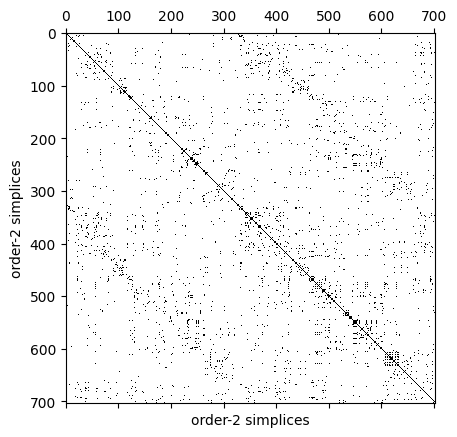

In [20]:
plt.spy(L)
plt.xlabel("order-2 simplices")
plt.ylabel("order-2 simplices")

In [21]:
H = xgi.load_xgi_data("kaggle-whats-cooking")
cuisines = set(H.edges.attrs("name").aslist())
subhypergraphs = dict()

print(cuisines)

for c in cuisines:
    subhypergraphs[c] = xgi.subhypergraph(H, edges=H.edges.filterby_attr("name", c))

{'mexican', 'italian', 'korean', 'spanish', 'chinese', 'russian', 'brazilian', 'greek', 'filipino', 'indian', 'british', 'french', 'japanese', 'southern_us', 'moroccan', 'thai', 'jamaican', 'irish', 'cajun_creole', 'vietnamese'}


In [22]:
num_unused_ingredients = dict()
most_used_ingredient = dict()
num_components = dict()

for c in cuisines:
    num_unused_ingredients[c] = len(subhypergraphs[c].nodes.isolates())
    d = subhypergraphs[c].nodes.degree.asdict()
    id = max(d, key=d.get)
    most_used_ingredient[c] = H.nodes[id]["name"]
    num_components[c] = xgi.number_connected_components(subhypergraphs[c])

In [23]:
print("Number of unused ingredients:")
print(num_unused_ingredients)
print("Most used ingredient:")
print(most_used_ingredient)
print("Number of connected components:")
print(num_components)

Number of unused ingredients:
{'mexican': 4030, 'italian': 3785, 'korean': 5816, 'spanish': 5451, 'chinese': 4922, 'russian': 5842, 'brazilian': 5861, 'greek': 5516, 'filipino': 5767, 'indian': 5050, 'british': 5548, 'french': 4612, 'japanese': 5275, 'southern_us': 4252, 'moroccan': 5740, 'thai': 5338, 'jamaican': 5837, 'irish': 5715, 'cajun_creole': 5138, 'vietnamese': 5606}
Most used ingredient:
{'mexican': 'sugar', 'italian': 'sugar', 'korean': 'bucatini', 'spanish': 'sugar', 'chinese': 'bucatini', 'russian': 'sugar', 'brazilian': 'sugar', 'greek': 'sugar', 'filipino': 'sugar', 'indian': 'sugar', 'british': 'sugar', 'french': 'sugar', 'japanese': 'bucatini', 'southern_us': 'sugar', 'moroccan': 'sugar', 'thai': 'yellow rice', 'jamaican': 'sugar', 'irish': 'sugar', 'cajun_creole': 'sugar', 'vietnamese': 'yellow rice'}
Number of connected components:
{'mexican': 4031, 'italian': 3786, 'korean': 5817, 'spanish': 5452, 'chinese': 4923, 'russian': 5843, 'brazilian': 5862, 'greek': 5517, '

## Notebook 5

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x34076f380>,
  <matplotlib.collections.PatchCollection at 0x34076f4d0>))

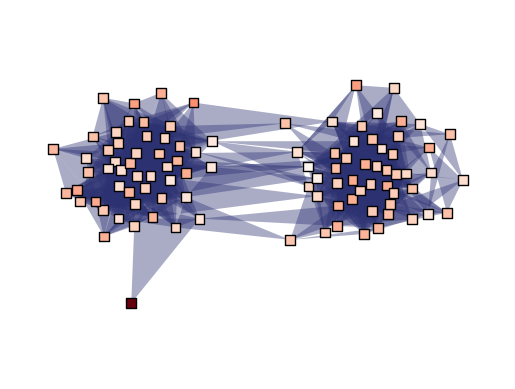

In [24]:
H = xgi.uniform_HPPM(100, 3, 8, 0.95)

pos = xgi.pca_transform(xgi.pairwise_spring_layout(H))
xgi.draw(H, pos=pos, node_fc=H.nodes.clustering_coefficient, node_shape="s")